# Introduction to Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

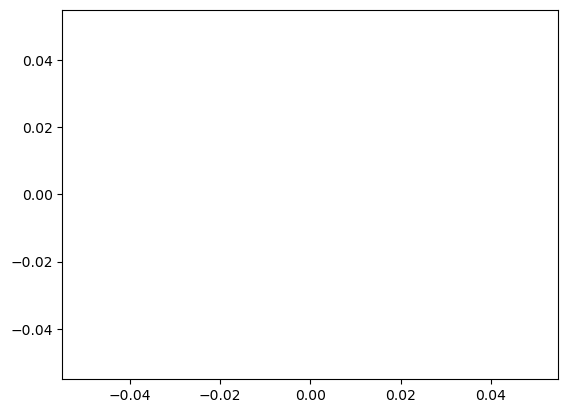

In [2]:
plt.plot()

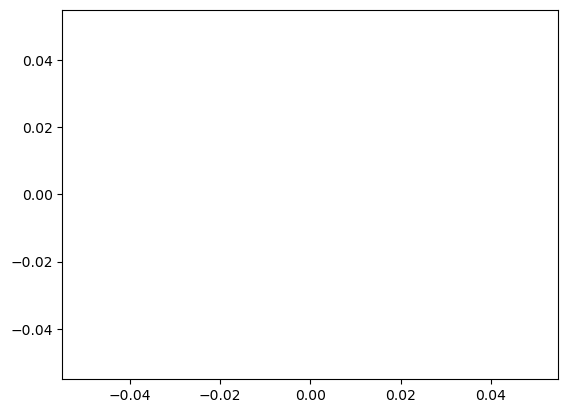

In [3]:
plt.plot(); # ensures no [] in the output

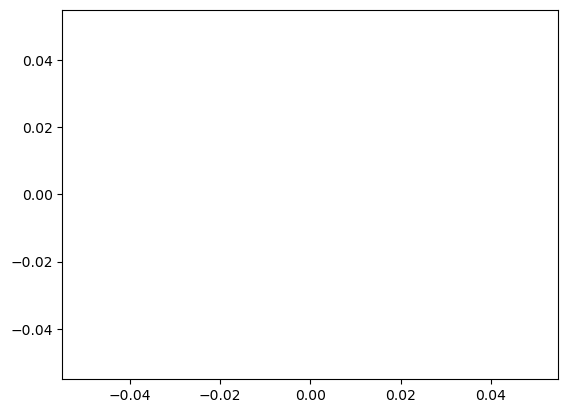

In [4]:
plt.plot() 
plt.show() # ensures no [] in the output

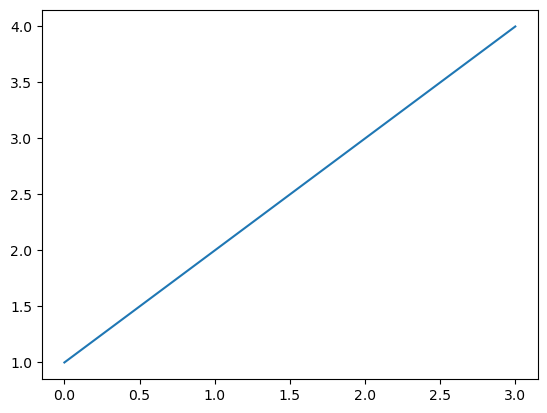

In [5]:
plt.plot([1, 2, 3, 4])

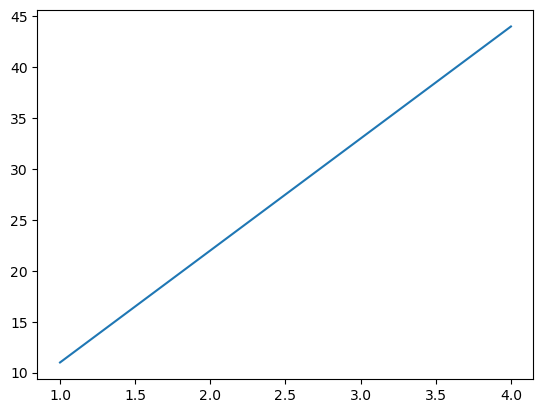

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y);

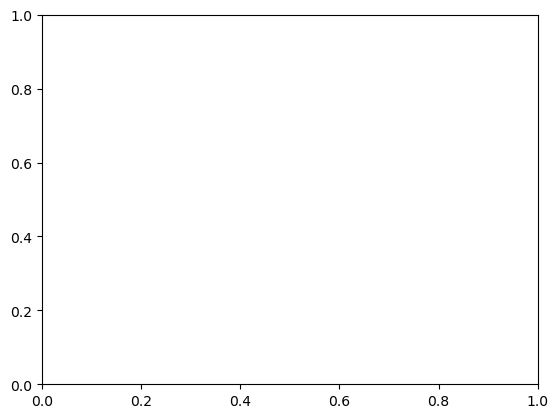

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

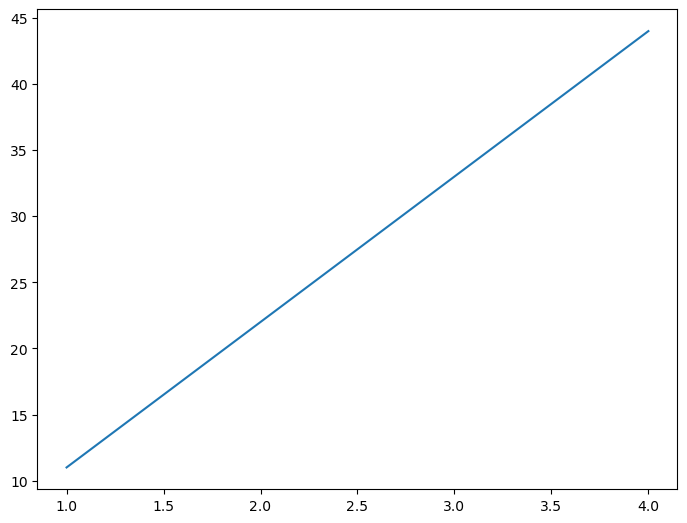

In [8]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

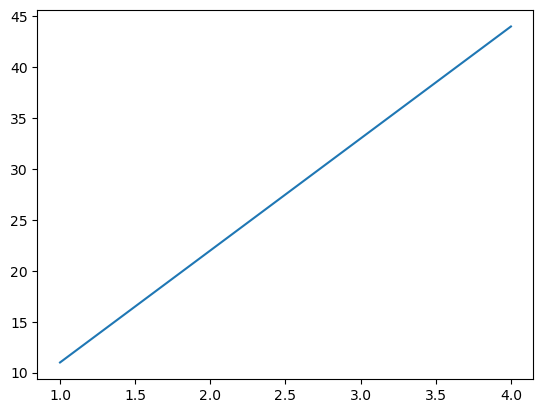

In [9]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add some data
type(fig), type(ax)

<img src="data/matplotlib-anatomy-of-a-plot.png" />

<img src="data/matplotlib-anatomy-of-a-plot-with-code.png" />

## Matplotlib example workflow

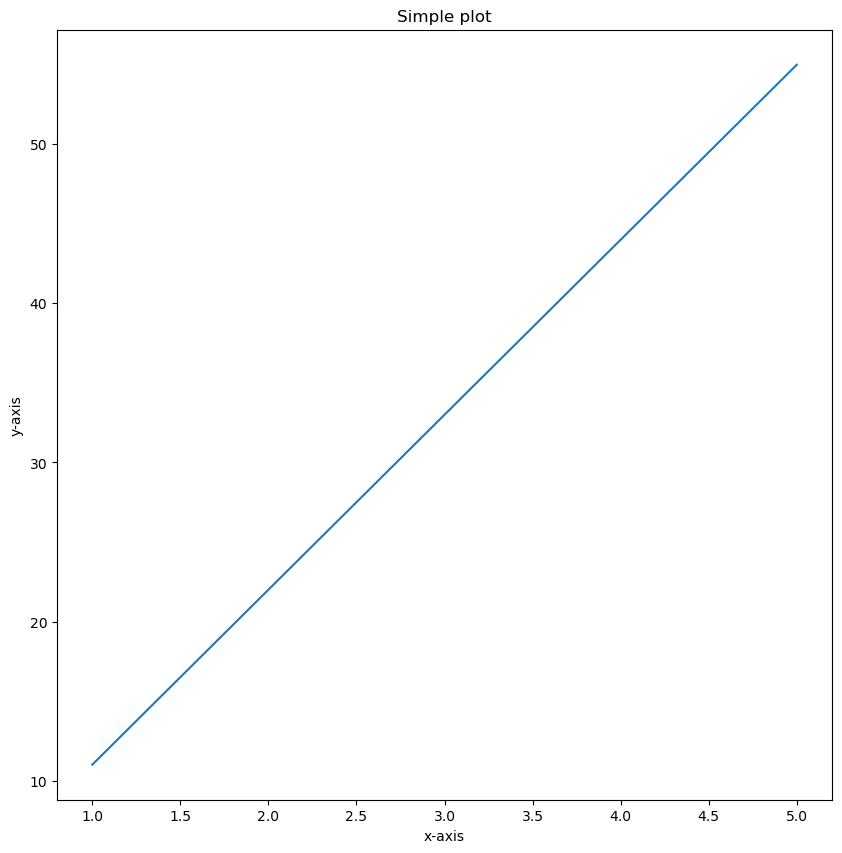

In [10]:
# 0. import matplotlib and get it ready for plotting in Jupyter
# %matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare some data
x = [1, 2, 3, 4, 5]
y = [11, 22, 33, 44, 55]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width, height)

# 3. plot the data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. save & show (you save the whole figure)
fig.savefig("data/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [11]:
import numpy as np

In [12]:
# create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

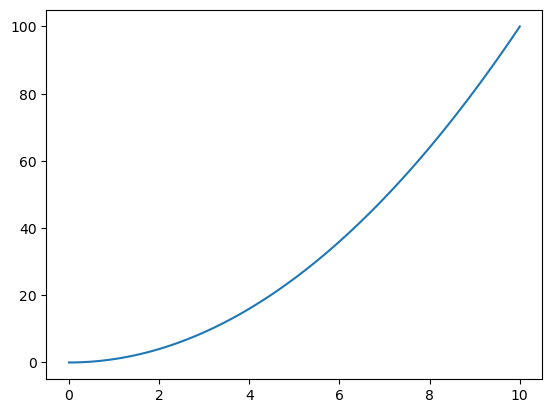

In [13]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

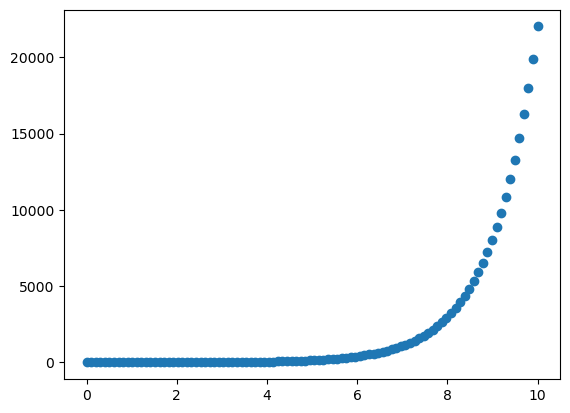

In [14]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

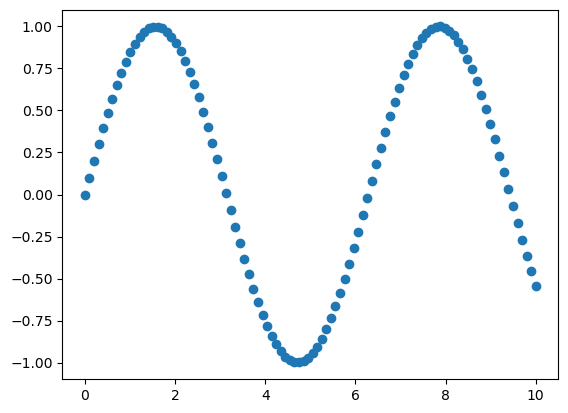

In [15]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

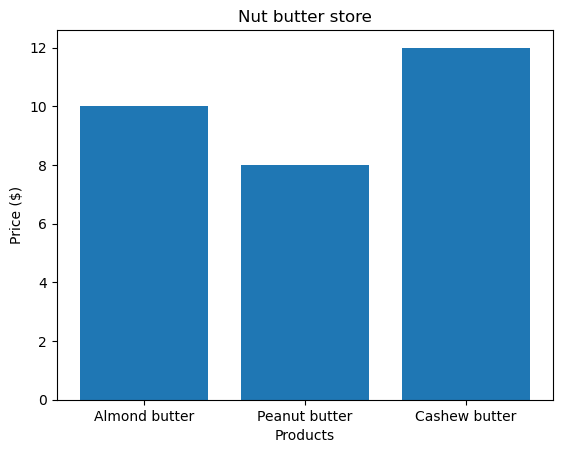

In [16]:
# Make a plot from dictionary
nut_butter_prices = {
    "Almond butter":10,
    "Peanut butter": 8,
    "Cashew butter": 12
}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Nut butter store",
       ylabel="Price ($)",
       xlabel="Products");

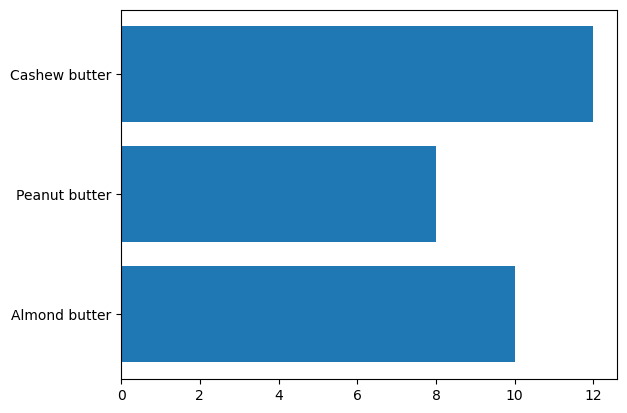

In [17]:
fig, ax = plt.subplots()
ax.barh(nut_butter_prices.keys(), nut_butter_prices.values());

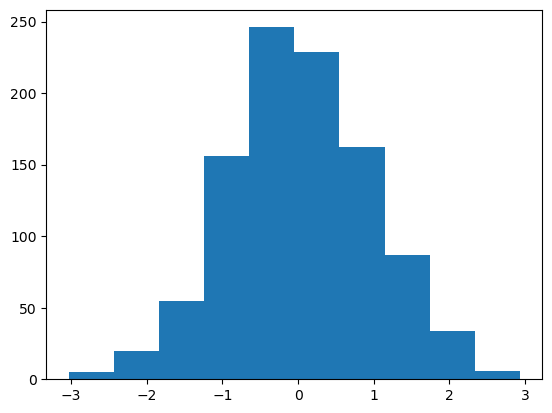

In [18]:
# Make some data for histograms and plot it
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

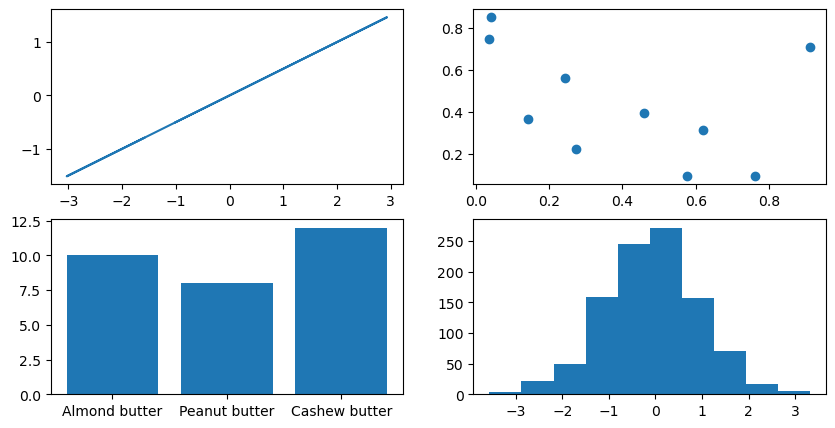

In [19]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

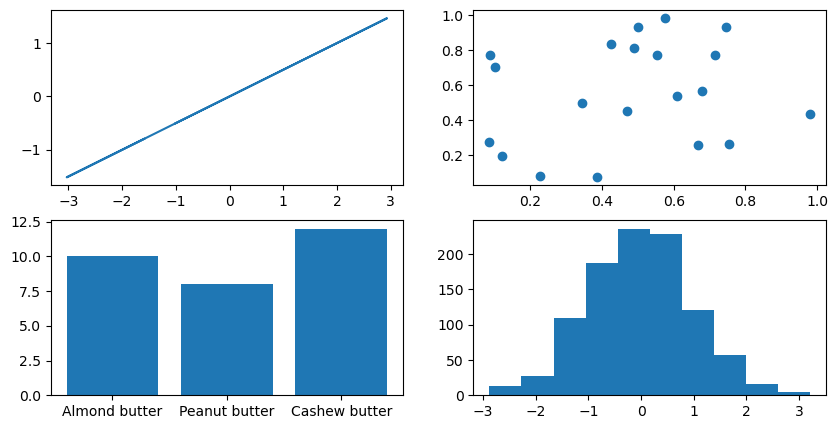

In [20]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(20), np.random.random(20));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [21]:
import pandas as pd

In [22]:
# Make a dataframe
car_sales = pd.read_csv("data/car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


<Axes: >

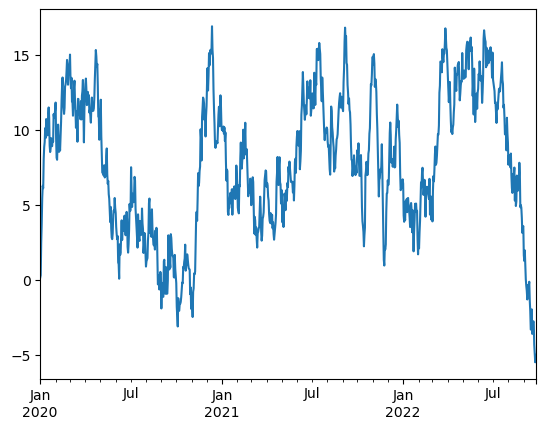

In [23]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot()

In [24]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [25]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "", regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [26]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]

In [27]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [28]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [29]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


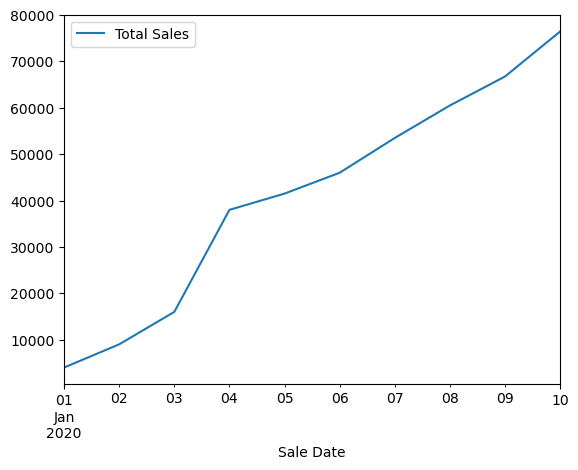

In [30]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

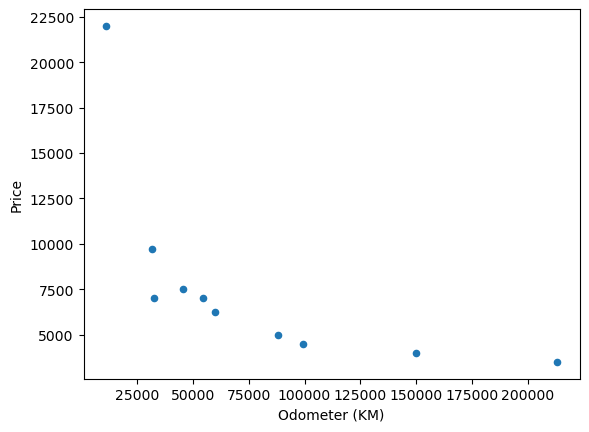

In [31]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [32]:
# How about a bar graph?
x = np.random.rand(10, 4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.068357,0.945577,0.112382,0.984530
1,0.010644,0.369479,0.107863,0.786833
2,0.086411,0.696258,0.326439,0.082588
3,0.748280,0.129035,0.277145,0.922731
4,0.947296,0.768402,0.799074,0.063050
5,0.211141,0.392598,0.956877,0.837127
6,0.726840,0.261922,0.641146,0.152936
7,0.939428,0.111075,0.690900,0.846937
8,0.768187,0.343906,0.814733,0.335367
9,0.470401,0.963852,0.525510,0.068297


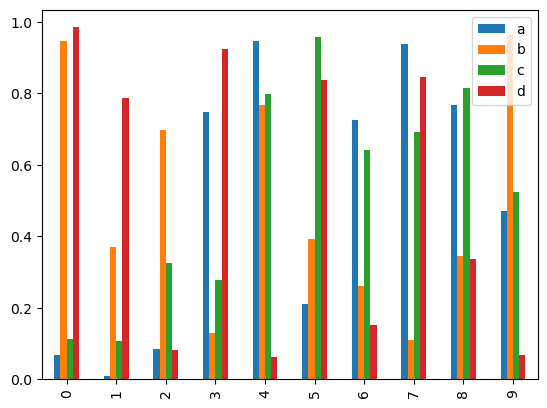

In [37]:
df.plot.bar();

# Same as df.plot(kind='bar');

In [39]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


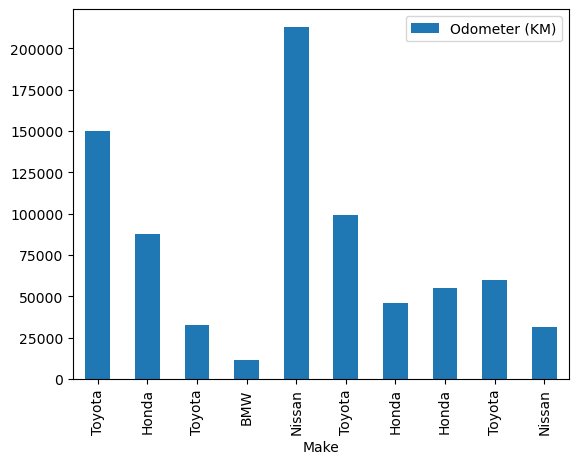

In [41]:
car_sales.plot(x="Make", y="Odometer (KM)", kind='bar');

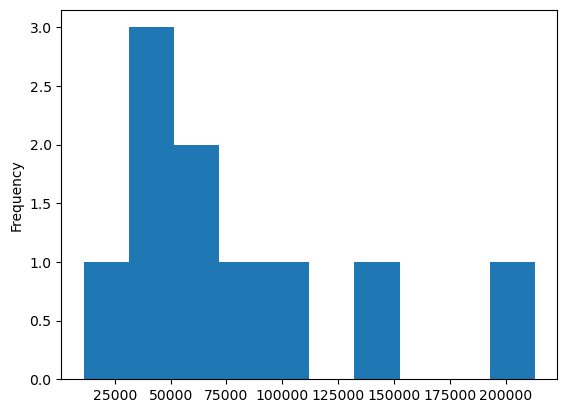

In [42]:
# How about histograms?

car_sales["Odometer (KM)"].plot.hist();

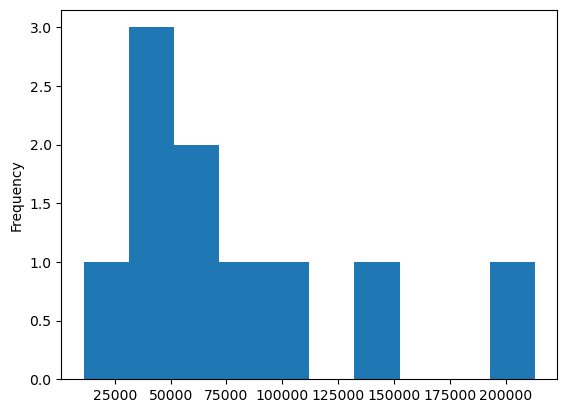

In [43]:
car_sales["Odometer (KM)"].plot(kind='hist');

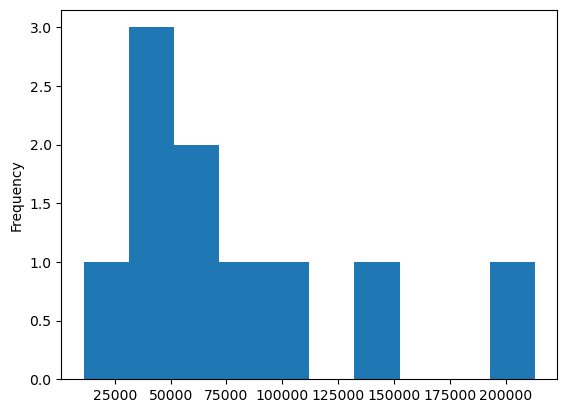

In [47]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [50]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


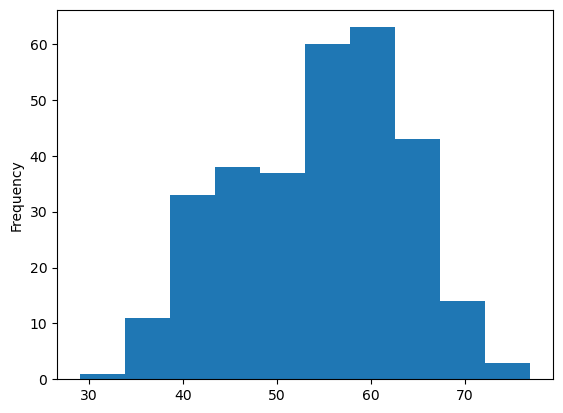

In [51]:
# Create a histogram
heart_disease["age"].plot.hist();

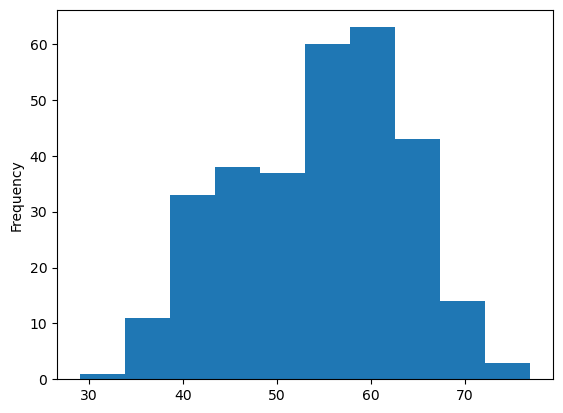

In [55]:
heart_disease["age"].plot.hist(bins=10);

In [56]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


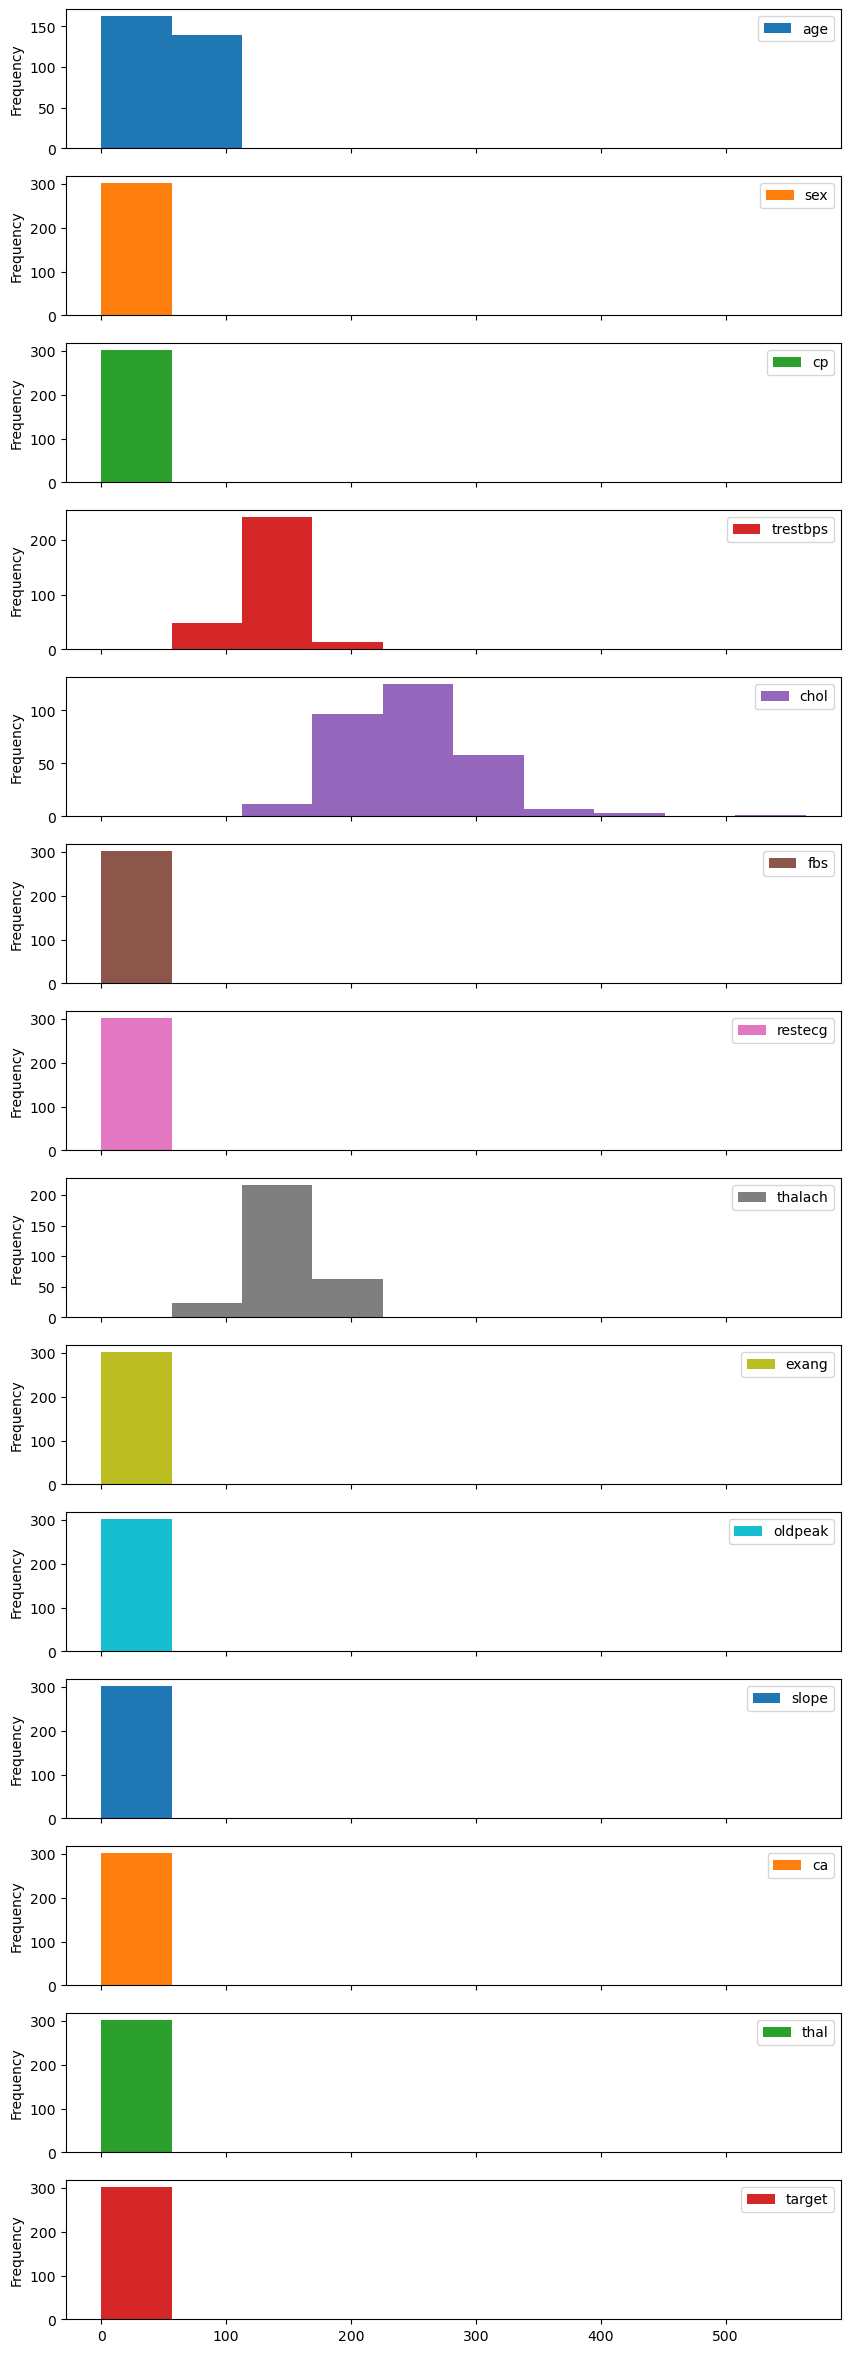

In [60]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* WHen plotting something advanced, use OO method

In [62]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


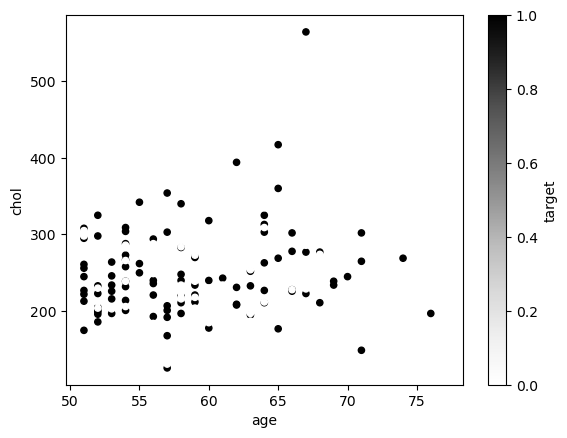

In [65]:
# Pyplot method

over_50.plot(kind='scatter', x='age', y='chol', c='target');

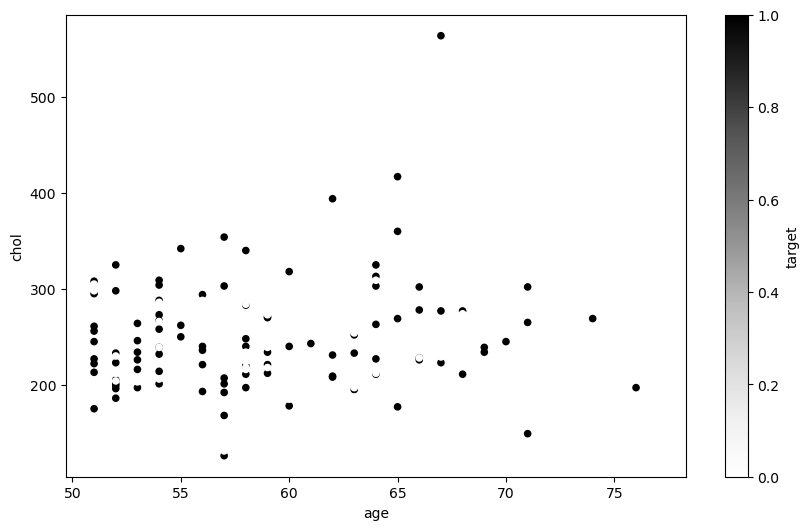

In [68]:
# OO method mixed with pyplot 
fig, ax = plt.subplots(figsize=(10, 6))

over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);

# ax.set_xlim([45, 100])

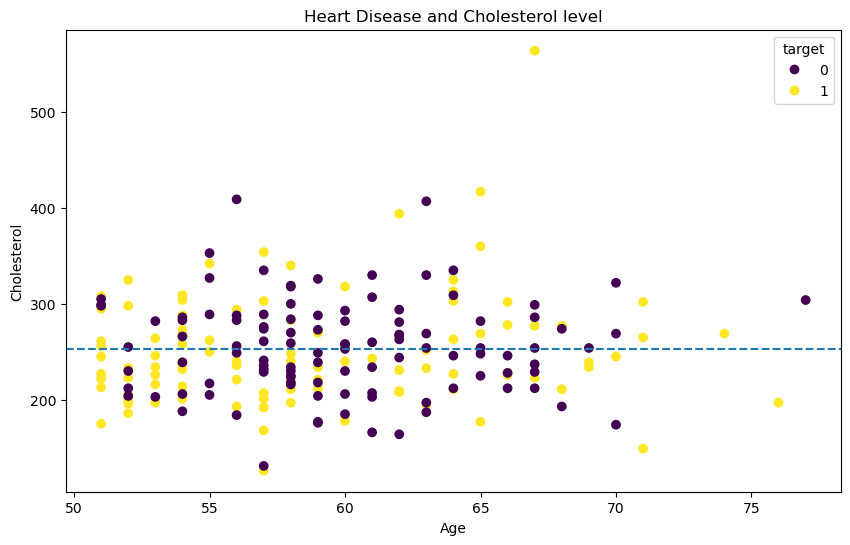

In [76]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);

# customize the plot
ax.set(title="Heart Disease and Cholesterol level",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

In [77]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


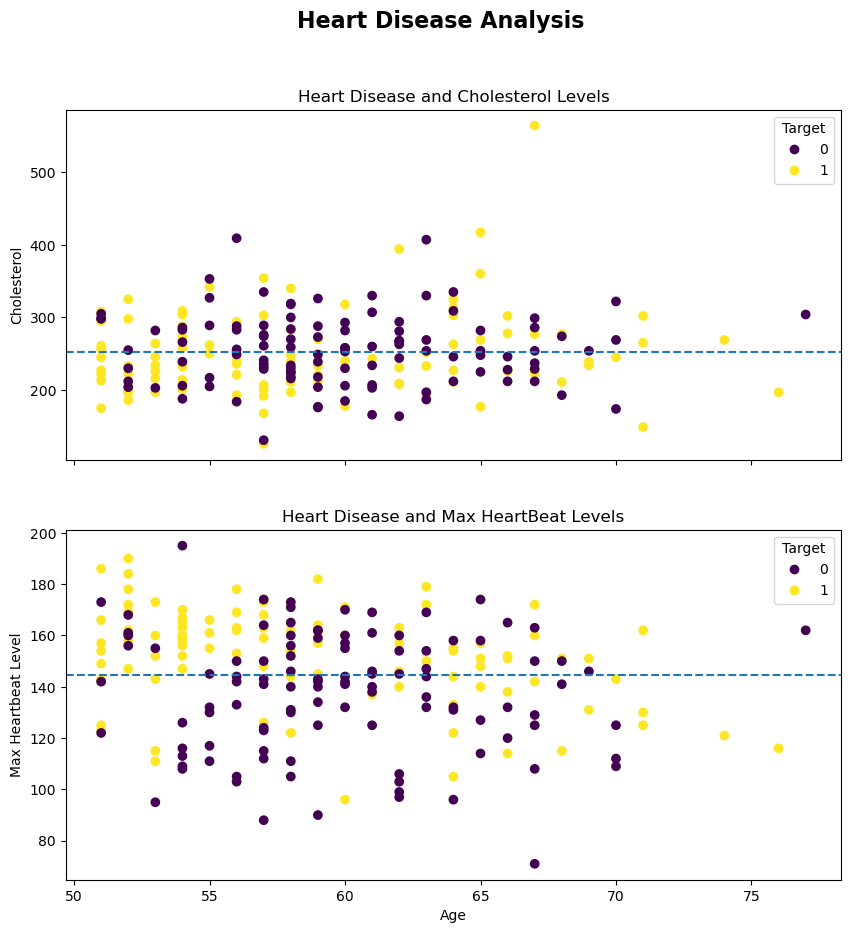

In [89]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(figsize=(10, 10),
                               nrows=2,
                               ncols=1,
                               sharex=True);

# Add data to ax0
scatter_chol = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# add a legend to ax0
ax0.legend(*scatter_chol.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");

# Add data to ax1
scatter_thalach = ax1.scatter(x=over_50["age"],
                              y=over_50["thalach"],
                              c=over_50["target"])

#Customize ax1
ax1.set(title="Heart Disease and Max HeartBeat Levels",
        xlabel="Age",
        ylabel="Max Heartbeat Level")

# Add a legend to ax1
ax1.legend(*scatter_thalach.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",
            fontsize=16,
            fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [90]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

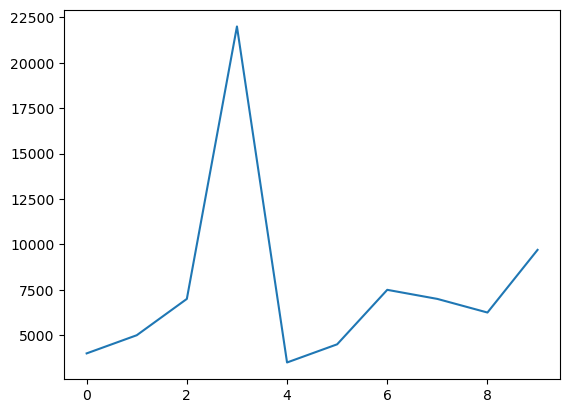

In [91]:
car_sales["Price"].plot();

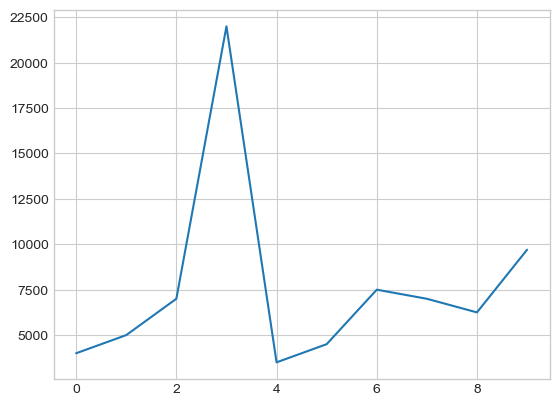

In [93]:
plt.style.use('seaborn-v0_8-whitegrid')
car_sales["Price"].plot();

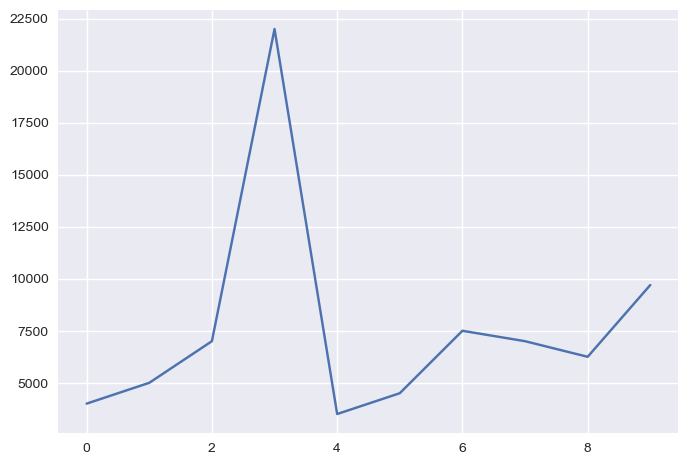

In [95]:
plt.style.use('seaborn-v0_8')
car_sales["Price"].plot();

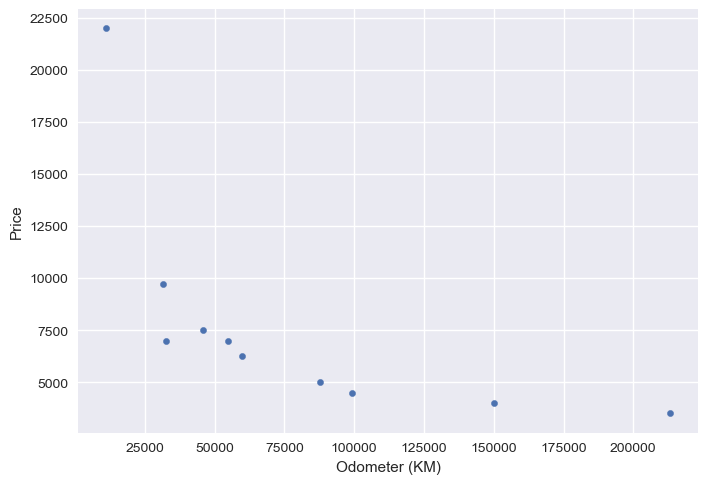

In [96]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

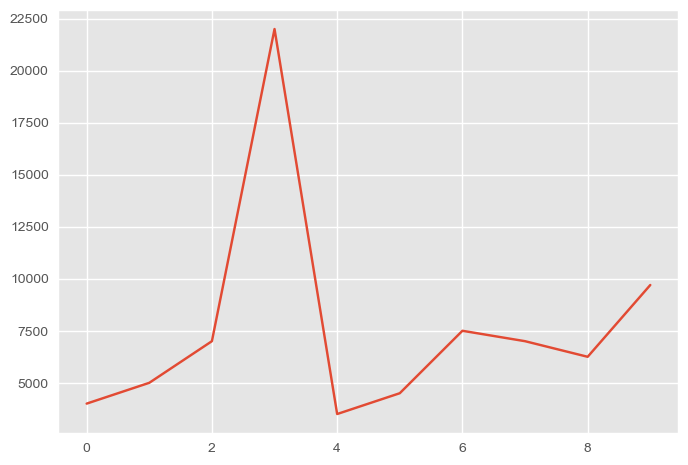

In [99]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [100]:
# Create some data
x = np.random.randn(10, 4)
x

array([[ 0.74730785,  0.53377531, -0.61167358, -0.93243305],
       [ 1.07731697,  0.05584449, -1.15540182,  0.25360602],
       [-0.67760023, -0.37111782,  0.58394196, -0.50471594],
       [ 0.18980019,  0.60385893, -1.53792861,  2.67396206],
       [-1.25313758, -0.71551357,  1.27173976, -0.40841928],
       [-0.29640958,  0.56453904, -0.74739103,  1.45509408],
       [ 1.31446404,  0.08690888, -0.15784723,  0.75456763],
       [ 1.56223919, -0.34646108,  0.41575404, -1.67319474],
       [-1.64719316, -1.39896152, -0.088934  , -2.72035072],
       [ 0.79401801, -1.51611777,  0.0753167 ,  0.0777971 ]])

In [101]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.747308,0.533775,-0.611674,-0.932433
1,1.077317,0.055844,-1.155402,0.253606
2,-0.677600,-0.371118,0.583942,-0.504716
3,0.189800,0.603859,-1.537929,2.673962
4,-1.253138,-0.715514,1.271740,-0.408419
5,-0.296410,0.564539,-0.747391,1.455094
6,1.314464,0.086909,-0.157847,0.754568
7,1.562239,-0.346461,0.415754,-1.673195
8,-1.647193,-1.398962,-0.088934,-2.720351
9,0.794018,-1.516118,0.075317,0.077797


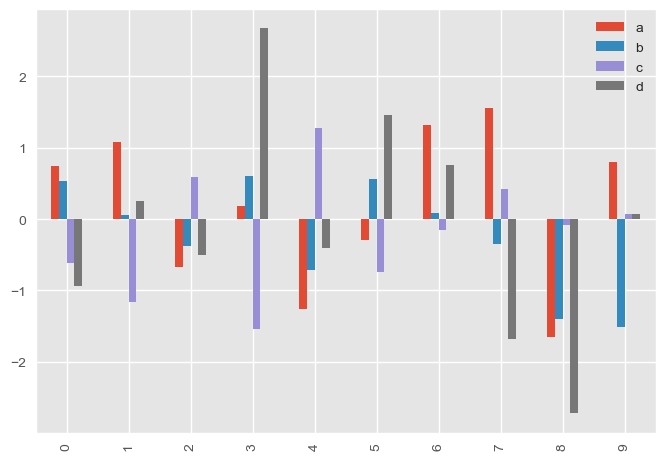

In [102]:
ax = df.plot(kind="bar");

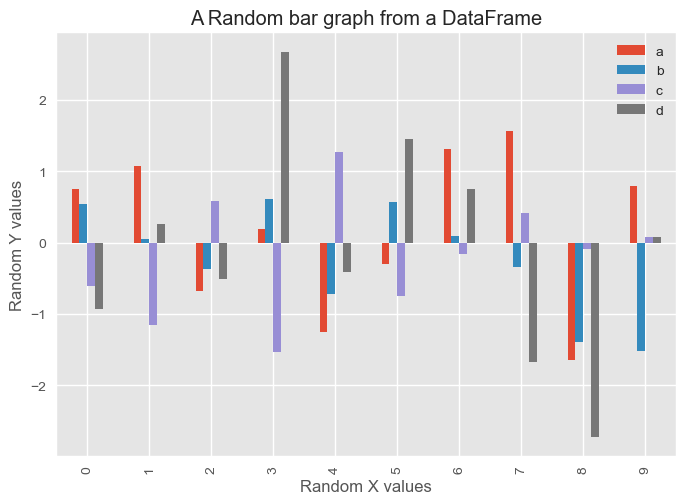

In [106]:
# Customize our plot with the set() method
ax = df.plot(kind="bar")

# Add some labels and a title
ax.set(title="A Random bar graph from a DataFrame",
       xlabel="Random X values",
       ylabel="Random Y values")

# Make legend visible
ax.legend().set_visible(True);

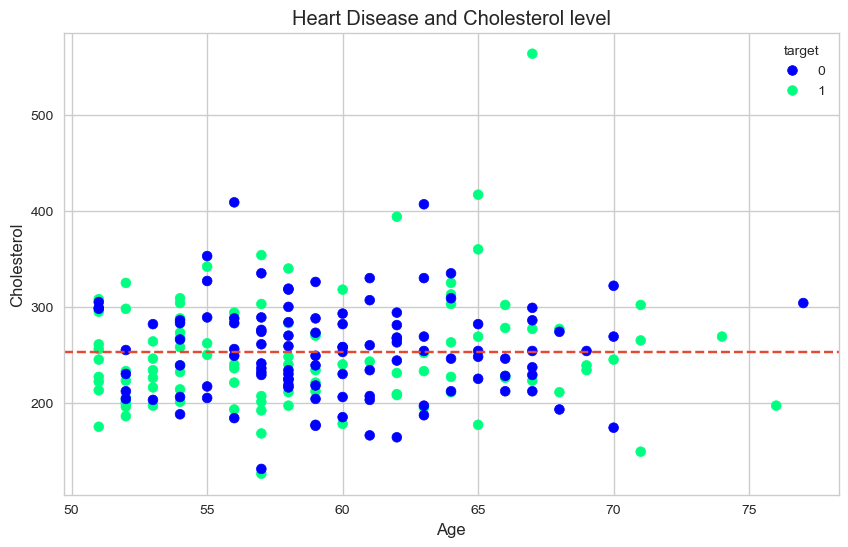

In [119]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                    cmap="winter") # This changes the color scheme

# customize the plot
ax.set(title="Heart Disease and Cholesterol level",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

### This plot shows some information about heart disease patients

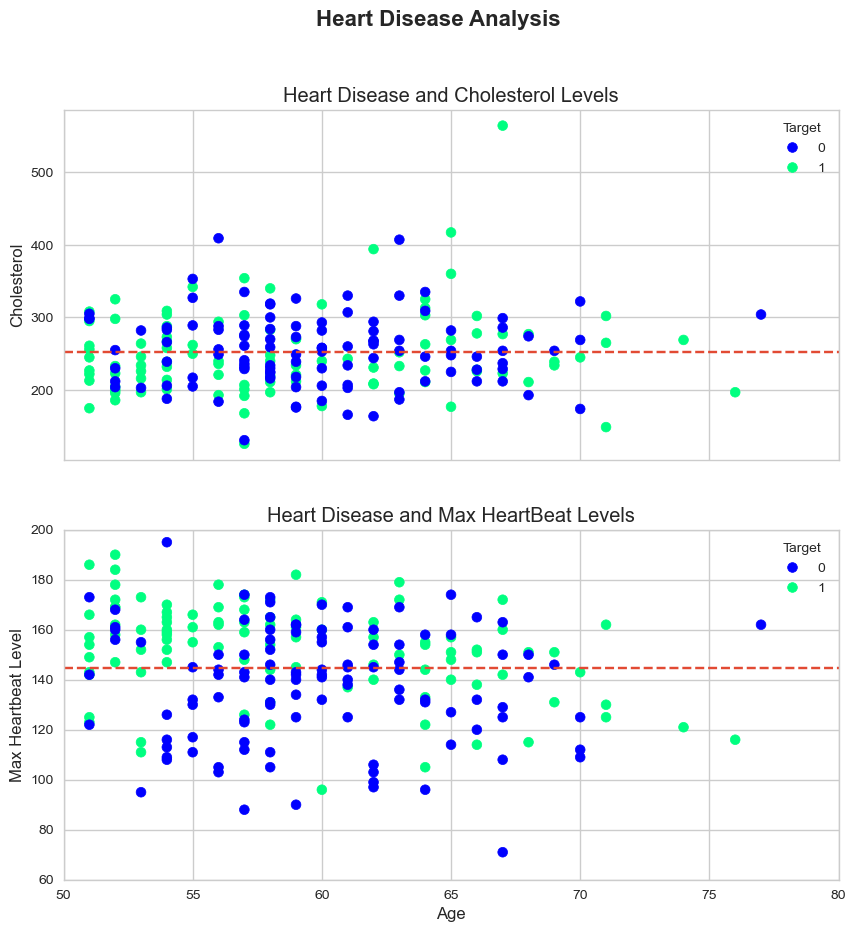

In [126]:
# Customizing the y and x axis limitations
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(figsize=(10, 10),
                               nrows=2,
                               ncols=1,
                               sharex=True);

# Add data to ax0
scatter_chol = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter")

# customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

ax0.set_xlim([50, 80]) # change the x axis limits

# add a legend to ax0
ax0.legend(*scatter_chol.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");

# Add data to ax1
scatter_thalach = ax1.scatter(x=over_50["age"],
                              y=over_50["thalach"],
                              c=over_50["target"],
                              cmap="winter")

#Customize ax1
ax1.set(title="Heart Disease and Max HeartBeat Levels",
        xlabel="Age",
        ylabel="Max Heartbeat Level")

ax1.set_xlim([50,80]) # Not nessasary because here x axis is shared with ax0 (initially we add ax0_xlim)
ax1.set_ylim([60, 200])
# Add a legend to ax1
ax1.legend(*scatter_thalach.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",
            fontsize=16,
            fontweight="bold");

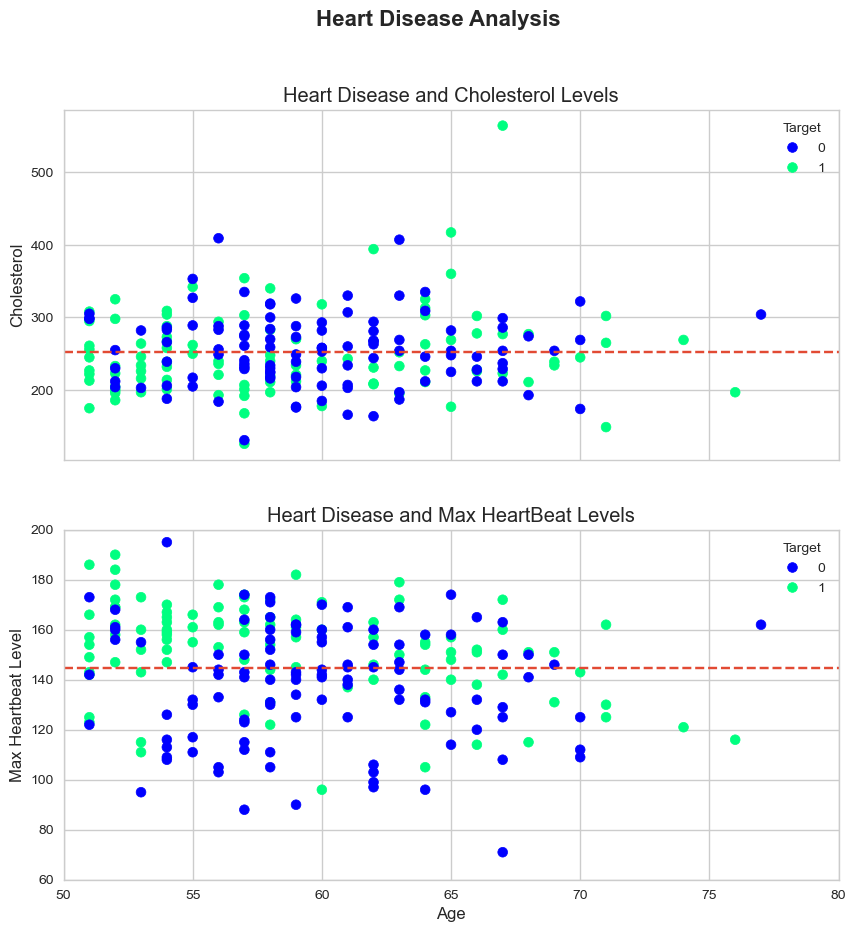

In [127]:
fig

In [128]:
# Save the figure
fig.savefig("data/heart-disease-analysis-plot.png")